## Lab 02 - Pandas and Data Visualization
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! **Note that the practice problems will be checked when submitted!**

#### Pandas
Pandas is a popular open-source Python library that provides data structures and data analysis tools for working with structured data. Pandas is a versatile library that simplifies data manipulation, analysis, and exploration in Python. Some of its uses:
* Tabular Data Handling
* Data Cleaning and Transformation
* Data Exploration
* Data Import/Export
* Data Visualization

#### Matplotlib
Matplotlib is a widely used for creating static, animated, and interactive visualizations. Whether you are conducting data analysis, scientific research, or data communication, Matplotlib helps you present your findings effectively and intuitively.

### Pre-requisites

In [1]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file :

The `cookies.csv` file contains information about cookies that were made in Rico's Bisquito's factory. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [86]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib.pyplot as plt

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [2]:
#TODO: read the cookies.csv file into a pandas dataframe
cookies = pd.read_csv("./cookies.csv")

#### Dataframe
Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [4]:
#TODO: print the head of the dataframe

cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04
3,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07
4,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39
5,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15
6,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.84
7,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.17
8,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,NaN
9,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",184,3.743,0.74


### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [5]:
#TODO: check the data types of the columns
cookies.dtypes

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object

Now, lets use use `info()` function to get more information about the Dataframe

In [6]:
# TODO: use info() to get information about datatypes and null values
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        129 non-null    object 
 1   ingredients   129 non-null    object 
 2   calories      129 non-null    int64  
 3   radius        129 non-null    float64
 4   cost_to_make  114 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.2+ KB


### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [15]:
#TODO: clean the dataframe and 
# print the head again to make sure 
# the changes took effect

# removing NaN elements
cookies.dropna(inplace=True)
cookies.head(10)
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        114 non-null    object 
 1   ingredients   114 non-null    object 
 2   calories      114 non-null    int64  
 3   radius        114 non-null    float64
 4   cost_to_make  114 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.3+ KB


To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [18]:
#TODO: use the isnull method to make sure your data is clean
cookies.isnull().count(False)

cookie          114
ingredients     114
calories        114
radius          114
cost_to_make    114
dtype: int64

Next, lets check for duplicate rows using the `duplicated()` function. Then, remove those rows using `drop_duplicates()` function.

In [23]:
# TODO: check for duplicate rows
# then delete those rows form df

cookies.drop_duplicates(inplace=True)
cookies.duplicated()
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        103 non-null    object 
 1   ingredients   103 non-null    object 
 2   calories      103 non-null    int64  
 3   radius        103 non-null    float64
 4   cost_to_make  103 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.8+ KB


### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [27]:
#TODO: see what cookies are in the dataset
cookies.cookie.unique()

array(['laddoo lemon', 'red velvet rauw', 'nevadito', 'bad berry bunny',
       'orange ozuna', 'minty miami', 'chocolate'], dtype=object)

We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [28]:
#TODO: use value_counts() to see how many 
# cookies of each type there are
cookies.cookie.value_counts()

red velvet rauw    17
orange ozuna       16
nevadito           15
bad berry bunny    15
minty miami        15
laddoo lemon       13
chocolate          12
Name: cookie, dtype: int64

Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [30]:
#TODO: change bad berry bunny data elements to "bbb"
cookies.cookie.replace(to_replace="bad berry bunny", value="bbb", inplace=True)
cookies.cookie.unique()

array(['laddoo lemon', 'red velvet rauw', 'nevadito', 'bbb',
       'orange ozuna', 'minty miami', 'chocolate'], dtype=object)

We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [38]:
#TODO: adjust orange ozuna as described
cookies.cookie = cookies.cookie.str.replace("orange ozuna", "orange_ozuna")
cookies.cookie.unique()

array(['laddoo lemon', 'red velvet rauw', 'nevadito', 'bbb',
       'orange_ozuna', 'minty miami', 'chocolate'], dtype=object)

We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [39]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name
cookies.cookie.replace("orange_ozuna", "orange", inplace=True)
cookies.cookie.unique()

array(['laddoo lemon', 'red velvet rauw', 'nevadito', 'bbb', 'orange',
       'minty miami', 'chocolate'], dtype=object)

Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values. We can do this by using the `apply()` function on the `cost_to_make` column.

In [42]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
print(cookies.cost_to_make)
cookies.cost_to_make = cookies.cost_to_make.apply(adjust_cost)
cookies.head()

0      0.67
1      1.07
2      1.04
4      1.39
5      1.15
       ... 
121    1.42
122    2.00
125    1.61
126    1.33
127    1.36
Name: cost_to_make, Length: 103, dtype: float64


,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.17
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.57
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.54
4,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.89
5,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.65


And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

Before trying out these complicated operations, lets first sort the sort the df by the radius of the cookies using the `sort_values()` function.

In [44]:
# TODO: sort the df using sort_values(by='Column', ascending=False)
cookies.sort_values(by="radius", ascending=False)

,cookie,ingredients,calories,radius,cost_to_make
110,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,4.930,1.55
30,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",204,4.667,1.90
60,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.56
49,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",195,4.562,1.12
101,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,4.519,1.91
...,...,...,...,...,...
93,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",198,3.128,1.09
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.17
22,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.51
32,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.34


We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [52]:
#TODO: group by cookie type

cookies.groupby(cookies.cookie)
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.17
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.57
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.54
4,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.89
5,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.65
6,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,1.34
7,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.67
9,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",184,3.743,1.24
10,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.78
11,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,1.26


We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [56]:
#TODO: group by cookie type and ingredients

cookies.groupby([cookies.cookie, cookies.ingredients])
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.17
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.57
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.54
4,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.89
5,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.65
6,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,1.34
7,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.67
9,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",184,3.743,1.24
10,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.78
11,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,1.26


We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [58]:
#TODO: filter using the boolean expression
cookies = cookies.loc[cookies["radius"] > 4.3]
cookies.head()

,cookie,ingredients,calories,radius,cost_to_make
29,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.68
30,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",204,4.667,1.90
47,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",174,4.388,1.14
49,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",195,4.562,1.12
60,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.56


We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [60]:
#TODO: filter the data using the boolean expression
# then group by cookie column

cookies.loc[cookies.radius > 4.3].groupby(cookies["cookie"]).head()

,cookie,ingredients,calories,radius,cost_to_make
29,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.68
30,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",204,4.667,1.90
47,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",174,4.388,1.14
49,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",195,4.562,1.12
60,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.56
62,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",206,4.328,1.84
72,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",196,4.425,1.37
76,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",206,4.319,1.74
80,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",197,4.461,2.17
87,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",199,4.474,1.64


We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [64]:
#TODO: add a column to the dataframe that is the
# calories per radius

cookies["calories_per_radius"] = cookies.apply(
    lambda row: row["calories"] / row["radius"],
    axis=1
)

cookies.head()

,cookie,ingredients,calories,radius,cost_to_make,calories_per_radius
29,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.68,50.391164
30,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",204,4.667,1.90,43.711163
47,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",174,4.388,1.14,39.653601
49,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",195,4.562,1.12,42.744410
60,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.56,40.673518


Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [72]:
#TODO: drop the created column
cookies.drop("calories_per_radius", axis=1, inplace=True)
cookies.head()

,cookie,ingredients,calories,radius,cost_to_make
29,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.68
30,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",204,4.667,1.90
47,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",174,4.388,1.14
49,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",195,4.562,1.12
60,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.56


### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

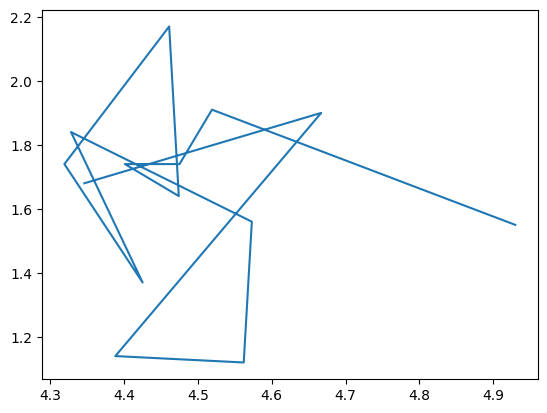

In [87]:
#TODO: plot the radius (x) versus cost to make (y)

plt.plot(cookies.radius, cookies.cost_to_make)

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

{'whiskers': [<matplotlib.lines.Line2D at 0x231175b1390>,
 'caps': [<matplotlib.lines.Line2D at 0x23119d85b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23119c38950>],
 'medians': [<matplotlib.lines.Line2D at 0x23119d86d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23119d851d0>],
 'means': []}

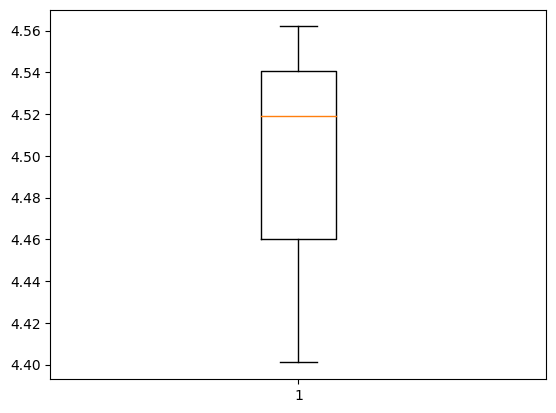

In [92]:
#TODO: add the described boxplot
# remember that you changed the name from laddoo lemon to laddoo

plt.boxplot(cookies.loc[cookies["cookie"] == "laddoo lemon"]["radius"])

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

(array([1., 0., 0., 0., 0., 1., 0., 1.]),
 array([4.401   , 4.421125, 4.44125 , 4.461375, 4.4815  , 4.501625,
        4.52175 , 4.541875, 4.562   ]),
 <BarContainer object of 8 artists>)

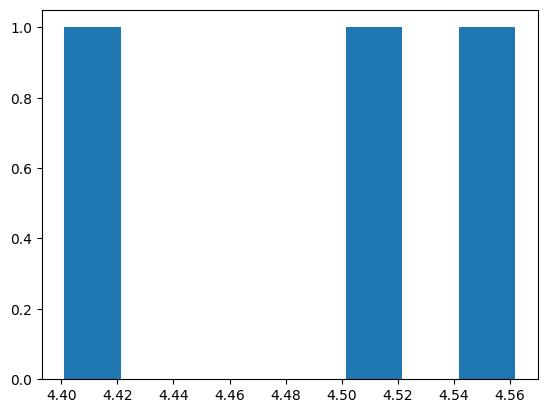

In [101]:
#TODO: add the described histogram

# I didn't want to go through the trouble of calculating everything out
# the built-in functions are easier!!!

plt.hist(cookies.loc[cookies["cookie"] == "laddoo lemon"]["radius"], bins=8)

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

{'whiskers': [<matplotlib.lines.Line2D at 0x2311b6c16d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2311b6c2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2311b6c0dd0>,
 'medians': [<matplotlib.lines.Line2D at 0x2311b6c3c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x2311b6c2890>,
 'means': []}

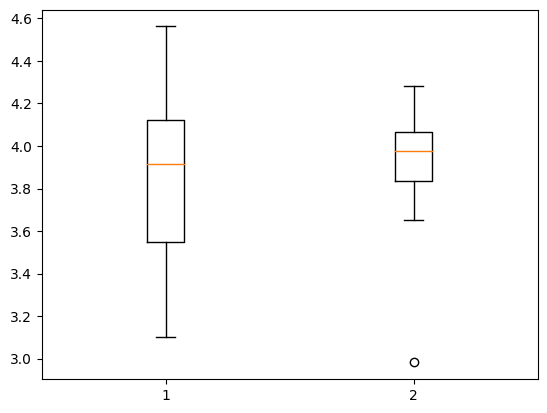

In [107]:
#TODO: analyze the two cookie's radius in a boxplot

# re-doing cookie importing to reset the dataframe
cookies = pd.read_csv("./cookies.csv")
cookies.dropna(inplace=True)
cookies.drop_duplicates(inplace=True)

plt.boxplot(
    [cookies.loc[cookies["cookie"] == "laddoo lemon"]["radius"],
    cookies.loc[cookies["cookie"] == "bad berry bunny"]["radius"]]
)

### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [109]:
#Add your code here
cookies.shape[0]

103

#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [111]:
#Add your code here
cookies["large_cookie"] = cookies.apply(
    lambda row: row["radius"] > 4,
    axis=1
)
cookies.head()

,cookie,ingredients,calories,radius,cost_to_make,large_cookie
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67,False
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07,False
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,True
4,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39,True
5,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15,False


#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [115]:
#Add your code here

cookies["avg_radius"] = cookies.groupby(cookies.cookie)["radius"].transform('mean')
cookies.head()

,cookie,ingredients,calories,radius,cost_to_make,large_cookie,avg_radius
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67,False,3.849000
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07,False,4.106471
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,True,3.959000
4,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39,True,3.914867
5,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15,False,3.506125


#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [118]:
#Add your code here

choco_chip = cookies.loc[cookies.ingredients.str.contains("chocolate chips")]
choco_chip.head()

,cookie,ingredients,calories,radius,cost_to_make,large_cookie,avg_radius
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,True,3.959000
7,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.17,False,4.062833
10,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.28,False,3.959000
17,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,1.53,False,4.062833
19,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",236,4.043,1.29,True,3.959000


#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

{'whiskers': [<matplotlib.lines.Line2D at 0x2311a564d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2311a550e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2311a5cf050>],
 'medians': [<matplotlib.lines.Line2D at 0x2311a58bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2311a564510>],
 'means': []}

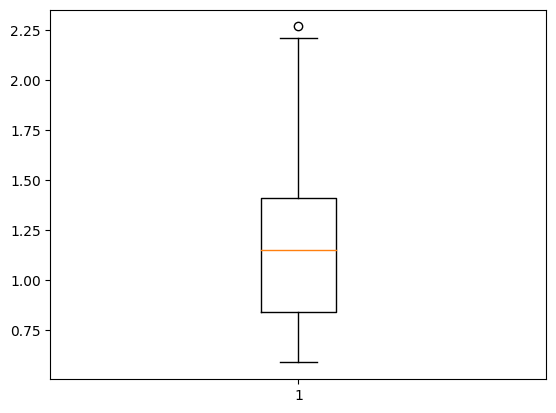

In [120]:
#Add your code here

plt.boxplot(cookies.loc[cookies["cookie"] != "chocolate"]["cost_to_make"])

#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

(array([2., 1., 2., 4., 1., 1., 2., 0., 1., 1.]),
 array([171. , 175.2, 179.4, 183.6, 187.8, 192. , 196.2, 200.4, 204.6,
        208.8, 213. ]),
 <BarContainer object of 10 artists>)

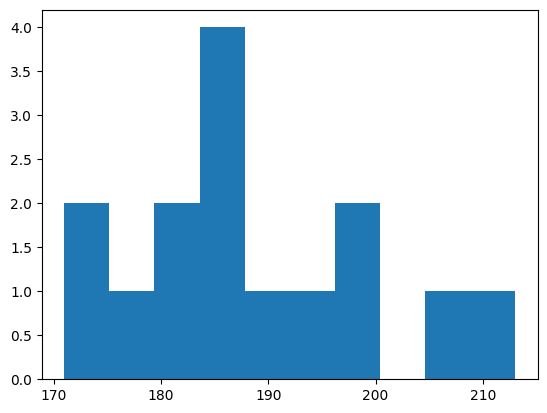

In [130]:
#Add your code here

plt.hist(cookies.loc[cookies.cookie == "bad berry bunny"]["calories"], bins=10)

#### Problem 7

Calculate the average calories per cookie type and display the result in a bar chart.

<BarContainer object of 7 artists>

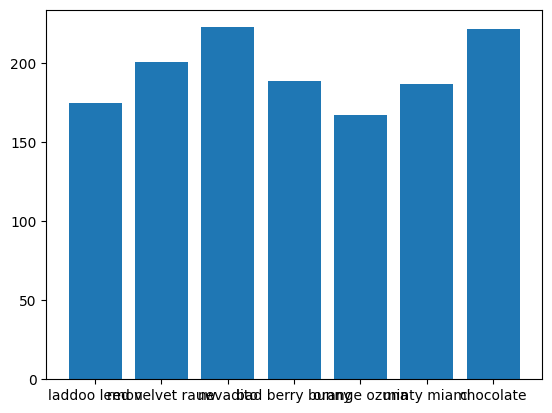

In [136]:
#Add your code here

avg_calories = cookies.groupby(cookies.cookie)["calories"].transform("mean")

# plt.bar(avg_calories)
plt.bar(cookies.cookie.unique(), avg_calories.unique())

#### Problem 8

Find the top 3 most expensive cookies in terms of cost_to_make

In [142]:
#Add your code here

cookies.sort_values("cost_to_make", ascending=False)[:3]

,cookie,ingredients,calories,radius,cost_to_make,large_cookie,avg_radius
42,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",176,4.110,2.27,True,3.849000
50,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",220,3.855,2.21,False,3.959000
13,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",159,3.429,2.09,False,3.506125
